I read the dataset with the masses of black holes binaries and I explore the data. Then I fit a Gaussian Mixture model multiple times, varying the number of the gaussians. Thanks to the AIC I can understand which is the best model.

In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os
import sklearn.mixture as mix

# Exploration of the data

In [4]:
data = np.load("formationchannels.npy")
precision = 150
xgrid = np.linspace(np.min(data), np.max(data), precision)

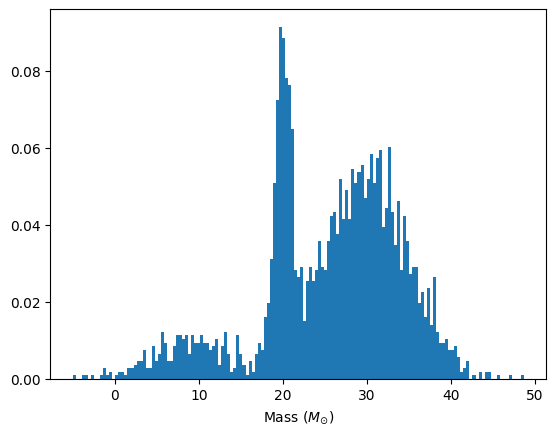

In [5]:
plt.hist(data, bins=xgrid, density=True)
plt.xlabel('Mass ($M_{\\odot}$)')
plt.show()

# Fit with Gaussian Mixture

(150, 1)


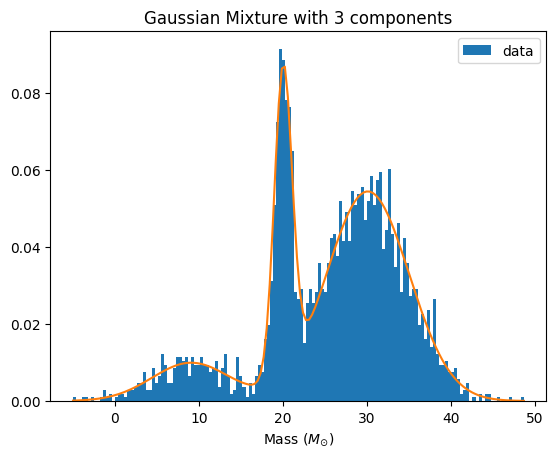

In [6]:
# At first I perform a fit choosing the number of gaussians by eye

gm = mix.GaussianMixture(3).fit(data)   #I choose 3 because the dataset seem to be well described by 3 gaussians
y=xgrid[:,np.newaxis]
print(np.shape(y))
# I need to change the array shape thanks to [:,np.newaxis] because score_samples works with arrays (n_samples, n_features)

y_pred = gm.score_samples(y)  #score_samples computes the log-likelihood on the grid points
plt.hist(data, bins=xgrid, density=True, label='data')
plt.plot(xgrid, np.exp(y_pred))   #I use the exponential because y_pred is in log
plt.title('Gaussian Mixture with 3 components')
plt.xlabel('Mass ($M_{\\odot}$)')
plt.legend()
plt.show()

# Exploration changing the number of modes

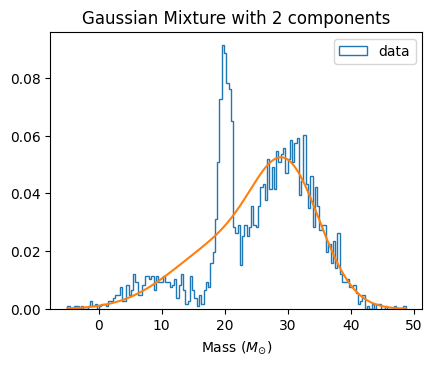

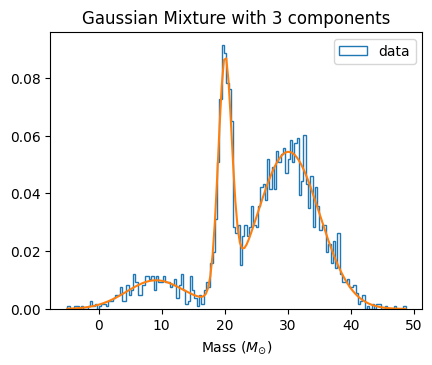

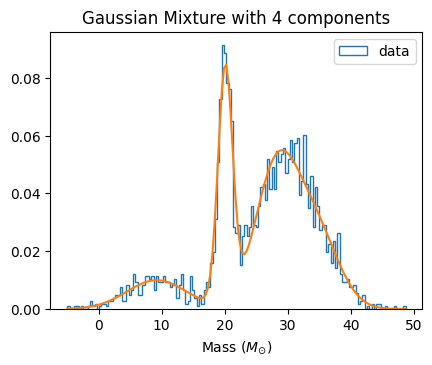

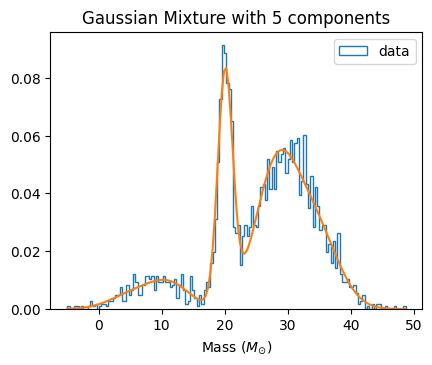

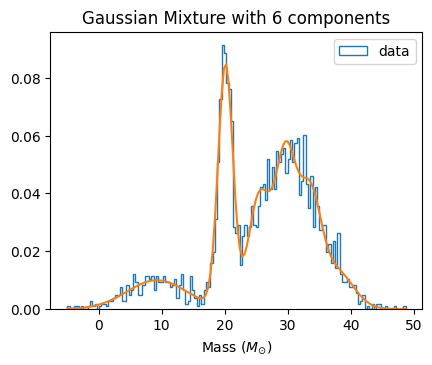

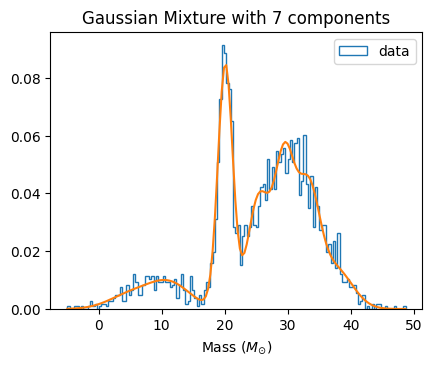

In [7]:
# I compare different fits changing the number of modes
for n in range (2, 8):
    # I do exactly as in the previous cell, varying the number of modes
    gm = mix.GaussianMixture(n).fit(data) 
    y_pred_temp = np.exp(gm.score_samples(y))
    plt.figure(figsize=[4.8, 3.6])
    plt.hist(data, bins=xgrid, density=True, histtype='step', label='data')
    plt.plot(xgrid, y_pred_temp)
    plt.title('Gaussian Mixture with %i components' %n)
    plt.xlabel('Mass ($M_{\\odot}$)')
    plt.legend()
    plt.show()

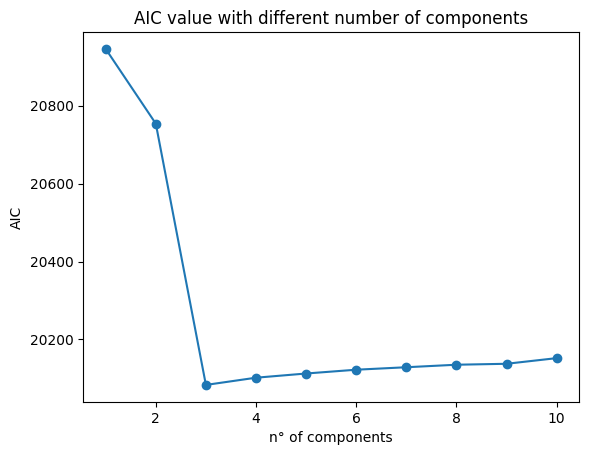

The minimum value is AIC= 20083.078946696394 , which corresponds to the model with n° of components= 3


In [8]:
# I compute the AIC related to the models with different number of modes
# The lower the AIC, the better the model
aic = []
N = []
for n in range (1, 11):
    gm = mix.GaussianMixture(n).fit(data)
    aic.append(gm.aic(data))
    N.append(n)

plt.plot(N, aic, '-o')
plt.title('AIC value with different number of components')
plt.xlabel('n° of components')
plt.ylabel('AIC')
plt.show()

index_true_n = np.argmin(aic)
print('The minimum value is AIC=', np.min(aic), ', which corresponds to the model with n° of components=', N[index_true_n])

I analyze which Gaussian mode corresponds to the different parts of the input dataset.

In [9]:
gm = mix.GaussianMixture(3).fit(data)
gauss_density = gm.predict_proba(y) # predict_proba evaluates the components density for each sample
print(gauss_density)
print(np.shape(gauss_density))
# I can see that each sample is related to 3 values, which are the densities of each Gaussian component

[[4.28578686e-009 9.99999996e-001 8.62587446e-118]
 [5.73713467e-009 9.99999994e-001 1.84116603e-114]
 [7.68437365e-009 9.99999992e-001 3.52566408e-111]
 [1.02984261e-008 9.99999990e-001 6.05685350e-108]
 [1.38096349e-008 9.99999986e-001 9.33493648e-105]
 [1.85285950e-008 9.99999981e-001 1.29072530e-101]
 [2.48743497e-008 9.99999975e-001 1.60108519e-098]
 [3.34125741e-008 9.99999967e-001 1.78177644e-095]
 [4.49073149e-008 9.99999955e-001 1.77889431e-092]
 [6.03911353e-008 9.99999940e-001 1.59332818e-089]
 [8.12602685e-008 9.99999919e-001 1.28031987e-086]
 [1.09403764e-007 9.99999891e-001 9.22974895e-084]
 [1.47378870e-007 9.99999853e-001 5.96924560e-081]
 [1.98649343e-007 9.99999801e-001 3.46343596e-078]
 [2.67909423e-007 9.99999732e-001 1.80282274e-075]
 [3.61524545e-007 9.99999638e-001 8.41893276e-073]
 [4.88131157e-007 9.99999512e-001 3.52711160e-070]
 [6.59453541e-007 9.99999341e-001 1.32568243e-067]
 [8.91416787e-007 9.99999109e-001 4.47010716e-065]
 [1.20566410e-006 9.99998794e-0

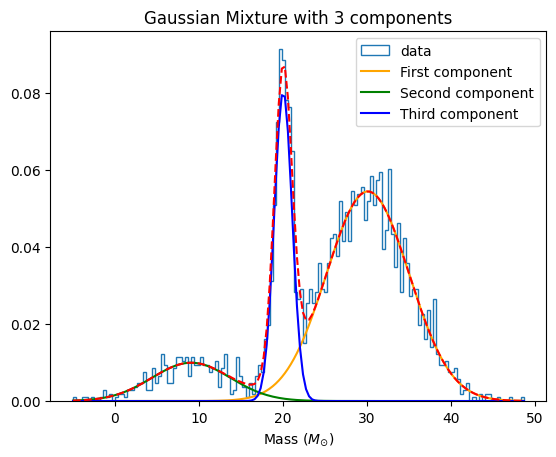

In [10]:
# I save the densities in single arrays and I multilpy them by the likelihood that I previously found
first = gauss_density[:, 0]
second = gauss_density[:, 1]
third = gauss_density[:, 2]

plt.hist(data, bins=xgrid, density=True, histtype='step', label='data')
plt.plot(xgrid, np.exp(y_pred)*first, label='First component', c='orange')
plt.plot(xgrid, np.exp(y_pred)*second, label='Second component', c='green')
plt.plot(xgrid, np.exp(y_pred)*third, label='Third component', c='blue')
plt.plot(xgrid, np.exp(y_pred), '--', c='red')
plt.title('Gaussian Mixture with 3 components')
plt.xlabel('Mass ($M_{\\odot}$)')
plt.legend()
plt.show()